# Introduction

# Equations

# Numerical Methods

In [1]:
#EAS 4610 proj
#crank-nicolson method 

# import packages
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
import os
import math
from scipy.sparse import spdiags
#import xarray as xr

In [2]:
# PARAMETERS 

k = 2 #m/d   hydraulic conductivity
n = 0.2  #effective porosity
S = 1e-6  #storage coeff
H = 45  #m #thickness of the aquifer
zb = -45 #m #bottom of aquifer
zt = 0 #m #top of aquifer
L = 1000 #m #length of the cross section
W = 1 #m #width of cross-section normal to the plane of flow
vs = 0.025 #dimensionless density
# ditch is located 590 m from the coastline at x = 0
h0 = 0.05 #m
N = 0 #infiltration of freshwater

tau = k*vs*(zt-zb)
T = k*(zt-zb)



# BOUNDARY CONDITIONS

Q0 = 0.1 #m**2/d - outflow, uniform flow towards the coast
Q0p = 0.05 #m**2/d - outflow when water is pumped from the ditch
zeta0 = -Q0/(k*vs) #m - boundary condition at the coast - top 
zeta0p = -Q0p/(k*vs) 
# at x=0, h0 = 0.05 m and zeta0 = -2 m
# at t=0, Q = -0.05 m**2/d
zetaf = -h0/vs  #steady state condition, end of simulation



# DISCRETIZING

x = np.linspace(0,L,L+1)
dx = 10 #m
t = np.linspace(0,36500,500)
dt = 73  #half a year in days

#courant number 
D = 1
CDz = tau*dt/(n*dx**2)
CDh = T*dt/(S*dx**2) #rename to S, currently D as fake storage coeff

#n should be the length of the spatial dimension
#n = len(x)
print(CDz,CDh)

8.2125 65700000.00000001


[[-2.          0.82664833 -1.02832184 ... -0.0124888  -0.01247625
  -0.01246374]
 [-2.         -0.0025148  -0.62670378 ... -0.02497683 -0.02495174
  -0.02492673]
 [-2.         -0.58845295 -0.54431545 ... -0.03746333 -0.0374257
  -0.03738819]
 ...
 [-2.         -0.58845295 -0.54431545 ... -0.03746333 -0.0374257
  -0.03738819]
 [-2.         -0.0025148  -0.62670378 ... -0.02497683 -0.02495174
  -0.02492673]
 [-2.          0.82664833 -1.02832184 ... -0.0124888  -0.01247625
  -0.01246374]]


'   \nprint(np.size(zetai1))\nprint(np.size(zeta))\nprint(len(zetai1))\nprint(len(zetai1[0]))\nprint(zetai1)\n\n#creating the known matrices\n#M**(k+1)\nbins = np.array([-1/2*Cd*np.ones(n),(1+Cd)*np.ones(n),-1/2*Cd*np.ones(n)])\ndiags = np.array([-1,0,1])\nM_k1 = spdiags(bins,diags,n,n).toarray()\n\n#M**k\nbins2 = np.array([1/2*Cd*np.ones(n),(1-Cd)*np.ones(n),1/2*Cd*np.ones(n)])\nM_k = spdiags(bins2,diags,n,n).toarray()\n\n#A\nA = np.ones(n,len(t))\nA[1,:] = zeta0_a\nA[-1,:] = zeta0_b\n'

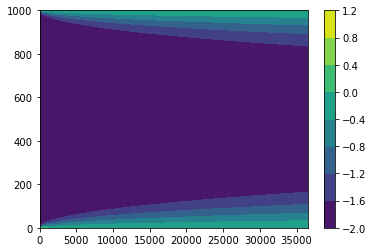

In [7]:
#Making the Matrices/running the model
'''
data1 = np.array([CDh*np.ones(L+1), (1-2*CDh)*np.ones(L+1), CDh*np.ones(L+1)])
diags1 = np.array([-1, 0, 1])
M = spdiags(data1, diags1,L-1,L-1).toarray()

data2 = np.array([CDh*np.ones(L+1), (1-CDh)*np.ones(L+1), CDh*np.ones(L+1)])
diags2 = np.array([-1, 0, 1])
M2 = spdiags(data2, diags2,L-1,L-1).toarray()

data3 = np.array([CDz*np.ones(L+1), (1-2*CDz/vs)*np.ones(L+1), CDz*np.ones(L+1)])
diags3 = np.array([-1, 0, 1])
A = spdiags(data3, diags3,L-1,L-1).toarray()

data4 = np.array([CDz*np.ones(L+1), (1-CDz/vs)*np.ones(L+1), CDz*np.ones(L+1)])
diags4 = np.array([-1, 0, 1])
B = spdiags(data4, diags4,L-1,L-1).toarray()
'''
CD = 2*tau*dt/(n*dx**2)

data3 = np.array([-0.5*CD*np.ones(L+1), (1+CD)*np.ones(L+1), -0.5*CD*np.ones(L+1)])
diags3 = np.array([-1, 0, 1])
A = spdiags(data3, diags3,L-1,L-1).toarray()

data4 = np.array([0.5*CD*np.ones(L+1), (1-CD)*np.ones(L+1), 0.5*CD*np.ones(L+1)])
diags4 = np.array([-1, 0, 1])
B = spdiags(data4, diags4,L-1,L-1).toarray()

#M2[0,:] = 0
#M[0,:] = 0
#M[0,0] = 1

#hi1 = np.zeros((L-1,500))
#zetai1 = np.zeros((L-1,500))
zeta = np.zeros((L-1,500))  #given values matrix for zeta
#hmat = np.zeros((L-1,500))  #given values matrix for h


#hi1[:,0] = 10 ##CHANGE THIS VALUE, JUST A PLACEHOLDER, INITIAL CONDITION HERE
#hmat[0,:] = h0
zeta[:,0] = zeta0
zeta[-1,:] = zetaf

#print(len(zeta))
#print(len(zeta[0]))


#print((hmat))
for i in range(0,len(t)-1):
    
    zeta[:,i+1] = np.linalg.inv(A)@(B@zeta[:,i])
   # hmat[:,i+1] = M@hmat[:,i] + M2@zeta[:,i] #+ N
   # zeta[:,i+1] = A@zeta[:,i] + B@hmat[:,i+1] #+ dt/n
    
 #   hi1[:,i+1] = np.matmul(M,hmat[:,i]) + np.matmul(M2,zetai1[:,i]) #+ N
  #  zetai1[:,i+1] = np.matmul(A,zeta[:,i]) + np.matmul(B,hi1[:,i+1]) #+ dt/n
  #  zetai1[:,i+1] = np.linalg.inv(hi1)@(hi@zetai1[:,i]+(0.5*CD)*zeta[:,i]-(-0.5*CD)*zeta[:,i+1])
  #  hi1[:,i+1] = np.linalg.inv(zetai1)@(zetai@hi1[:,i]+(0.5*CD)*hmat[:,i]-(-0.5*CD)*hmat[:,i+1])

Mf = np.zeros((L+1,500))   #final matrix
Mf[0,:] = -2
Mf[1:-1] = zeta[0:,:]
#Mf[-1,:] = zeta[-1,:]

'''
print(Mf)
print(hi1) 
print("Zetai1")
print(zetai1)
'''
print(zeta)

z = np.linspace(-45,0,500)
#print(Mf[0:55])
#plt.contourf(x[0:20],t,np.transpose(Mf[0:20]))
plt.contourf(t,x,Mf)
#plt.ylim(-45,-38)
plt.colorbar()

'''
for l in range(0,10):
    plt.plot(x,Mf[:,l])
#plt.ylim(0,5)
    plt.xlim(0,50)
    plt.show()

#print(zetai1)
'''
'''   
print(np.size(zetai1))
print(np.size(zeta))
print(len(zetai1))
print(len(zetai1[0]))
print(zetai1)

#creating the known matrices
#M**(k+1)
bins = np.array([-1/2*Cd*np.ones(n),(1+Cd)*np.ones(n),-1/2*Cd*np.ones(n)])
diags = np.array([-1,0,1])
M_k1 = spdiags(bins,diags,n,n).toarray()

#M**k
bins2 = np.array([1/2*Cd*np.ones(n),(1-Cd)*np.ones(n),1/2*Cd*np.ones(n)])
M_k = spdiags(bins2,diags,n,n).toarray()

#A
A = np.ones(n,len(t))
A[1,:] = zeta0_a
A[-1,:] = zeta0_b
'''

### Results

# Figures 

# Video Walkthrough

# References
Bakker, M. (1970, January 1). Simple groundwater flow models for seawater intrusion: Semantic scholar. undefined. Retrieved November 27, 2022, from https://www.semanticscholar.org/paper/SIMPLE-GROUNDWATER-FLOW-MODELS-FOR-SEAWATER-Bakker/1ac46ef8707dda37496dd907e3dc9e3b0d52c4bc 